In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification as mc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

In [2]:
X , y = mc(n_samples = 1000, n_features = 2 , n_informative=2, n_redundant=0, random_state=42)

In [ ]:
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [4]:
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 1
 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 0
 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1
 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1
 0 1 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 0 0 1
 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0
 1 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 1
 1 1 0 1]


In [8]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[133  15]
 [ 23 129]]


In [ ]:
classification_rpt = classification_report(y_test, y_pred)
print(classification_rpt)

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       148
           1       0.90      0.85      0.87       152

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



<Axes: >

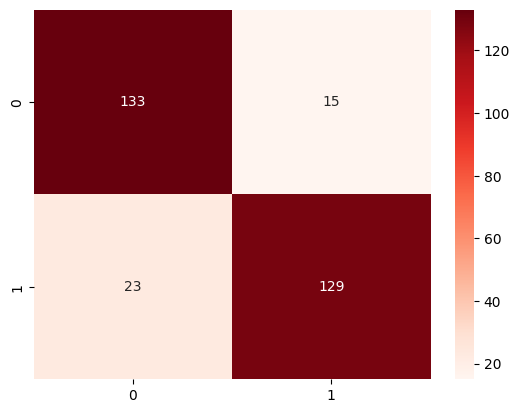

In [9]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', cbar=True)

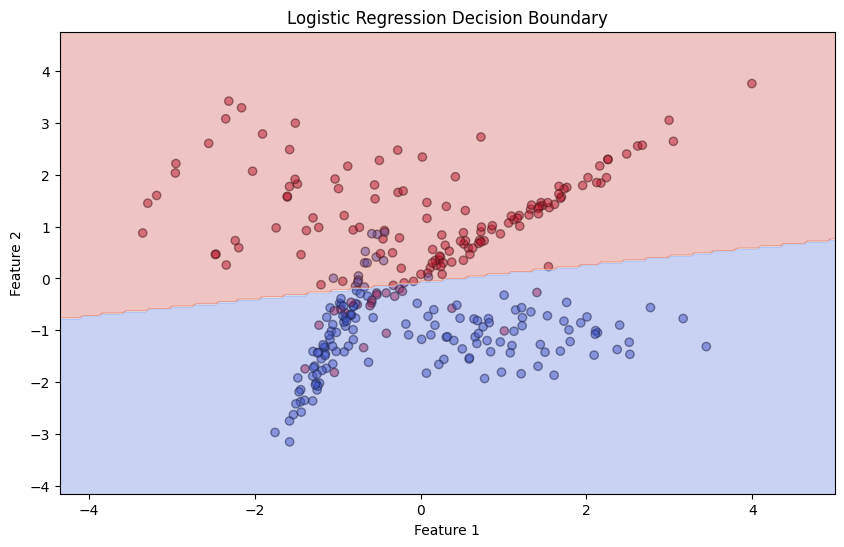

In [11]:
plt.figure(figsize=(10,6))
colors = {'X_test': 'magenta', 'y_test': 'cyan'}

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', edgecolors='k', alpha=0.5)

# Create a mesh to plot the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = logistic_regression_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()